### Image Pyramids
#### Ref
[OpenCV Pyramids](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_pyramids/py_pyramids.html)

[Image multiscale representation](http://cs.haifa.ac.il/hagit/courses/ip/Lectures/Ip11_MultiscaleRepx4.pdf)

[Image Mosaicing using Pyramids](http://pages.cs.wisc.edu/~csverma/CS766_09/ImageMosaic/imagemosaic.html)
#### Notes
- In an image, different features are having different res/scale thus require image at appropriate scale for algorithm to detect those features.
- Thus we generate several images at different res/scales from base image, such that stacking images from high-res (at lower level) to low-res (at upper-level) forms image pyramid.
- We then apply our algorithm to all these pyramid images to detect features of different scales.
    - As level increases, image size decreases, and image loses high freq features.
- Types of Pyramids
    - *Gaussian pyramid*
        - Higher levels are formed by convolving with gaussian filter (to prevent aliasing) and then removing consequetive rows and columns, that is sub-sampling by 2.
    - *Laplacian Pyramid*
        - Formed from gaussian pyramid levels.
        - Levels are similar to the edge images, thus most of the pixels ae 0, and useful in image compression.
        - `L_lap(k) = L_gau(k) - L_gau(k+1)_scaled`
        - The highest level in Laplacian pyramid remains same as tha in Gaussian pyramid.
        - To generate original image back, we need to scale-up the level and add it to lower level image.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# Read images
img = cv2.imread('/home/cognitifai/Pictures/landscape.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

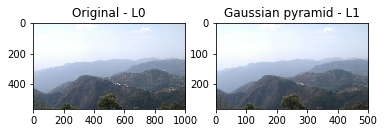

In [15]:
# Generate higher level image in Gaussian Pyramid
img_lowres = cv2.pyrDown(img)
plt.subplot(121), plt.imshow(img,"gray"), plt.title("Original - L0")
plt.subplot(122), plt.imshow(img_lowres,"gray"), plt.title("Gaussian pyramid - L1")
plt.show()

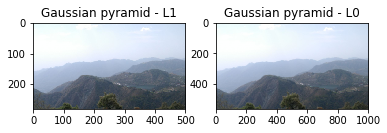

In [22]:
# generate lower level image from the one of higher level -  
# Extrapolate with 0s then apply gaussian smoothening filter. # We lose information 
img_highres = cv2.pyrUp(img_lowres)
plt.subplot(121), plt.imshow(img_lowres,"gray"), plt.title("Gaussian pyramid - L1")
plt.subplot(122), plt.imshow(img_highres,"gray"), plt.title("Gaussian pyramid - L0")
plt.show()

#### Image Blending/Mosaicing using Pyramids
- In applications like Image stitching, we can blend 2 images seamlessly without exposing discontinuities b/w images and w/o leaving image details, using image pyramids of those images.
- Steps broadly outlined -     
        Load the two images of apple and orange
        Find the Gaussian Pyramids for apple and orange (in this particular example, number of levels is 6)
        From Gaussian Pyramids, find their Laplacian Pyramids
        Now join the left half of apple and right half of orange in each levels of Laplacian Pyramids
        Finally from this joint image pyramids, reconstruct the original image.


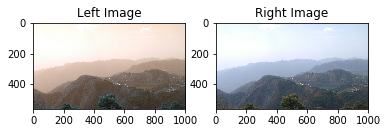

In [23]:
img_l = cv2.imread('/home/cognitifai/Pictures/landscape.jpg')
img_r = cv2.cvtColor(img_l, cv2.COLOR_BGR2RGB)

plt.subplot(121), plt.imshow(img_l,"gray"), plt.title("Left Image")
plt.subplot(122), plt.imshow(img_r,"gray"), plt.title("Right Image")
plt.show()

In [72]:
# Gaussian and laplacian pyramid of 6 levels for Left image
img_L = img_l.copy()
num_levels = 6

# Gaussian pyramid
gpL = [img_L]
for level in range(num_levels-1):
    img_L = cv2.pyrDown(img_L)
    gpL.append(img_L)

#laplacian pyramid
lpL = [gpL[num_levels-1]]
for level in range(num_levels-1,0,-1):
    img_level = gpL[level-1]
    h,w = img_level.shape[:2]
    img_L = cv2.subtract(img_level, cv2.resize(cv2.pyrUp(gpL[level]), (w,h)))
    lpL.append(img_L)

In [73]:
# Gaussian and laplacian pyramid of 6 levels for Right image
img_R = img_r.copy()
num_levels = 6

# Gaussian pyramid
gpR = [img_R]
for level in range(num_levels-1):
    img_R = cv2.pyrDown(img_R)
    gpR.append(img_R)

#laplacian pyramid
lpR = [gpR[num_levels-1]]
for level in range(num_levels-1,0,-1):
    img_level = gpR[level-1]
    h,w = img_level.shape[:2]
    img_R = cv2.subtract(img_level, cv2.resize(cv2.pyrUp(gpR[level]), (w,h)))
    lpR.append(img_R)

In [74]:
# Join halves of the images at each laplacian level
lpBlended = []
for level_l,level_r in zip(lpL,lpR):
    h,w,c = level_l.shape
    level_blended = np.hstack((level_l[:,:int(w/2)], level_r[:,int(w/2):]))
    lpBlended.append(level_blended)

In [75]:
# Reconstruct blended image from laplacian levels
img_blended = lpBlended[0]
for level in range(1,num_levels):
    img_lpB = lpBlended[level]
    h,w = img_lpB.shape[:2]
    img_blended = cv2.add(cv2.resize(cv2.pyrUp(img_blended),(w,h)), img_lpB)

In [79]:
# Directly connected image
h,w = img_l.shape[:2]
img_connected = np.hstack((img_l[:,:int(w/2)],img_r[:,int(w/2):]))

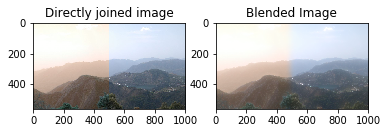

In [80]:
# Compare images side-by-side
plt.subplot(121), plt.imshow(img_connected,"gray"), plt.title("Directly joined image")
plt.subplot(122), plt.imshow(img_blended,"gray"), plt.title("Blended Image")
plt.show()

### Histogram - Image Intensity histogram
#### Ref
[OpenCV Histogram](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_histograms/py_table_of_contents_histograms/py_table_of_contents_histograms.html)
#### Notes
- A plot that gives intensity distribution of an image. i.e intensity values on x-axis and # of pixel for that intensity values on y-axis
- Intensity Histogram gives insights into Brightness, contrast, distribution for that image.
- In *openCV*, `cv2.calcHist()` used to generate histogram.
- In *Numpy*, `np.histogram()` - 1D histogram method
- *Histogram Equilization* - Contrast enhancement technique. A non-Linear transformation of intensity.
    - A good image has pixels of all intensity values. Thus here we stretch histogram to either ends to make it uniform
    - OpenCV has `cv2.equalizeHist()` method for 1-shot generation. But only takes grayscale image as input.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

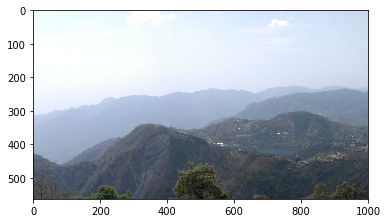

In [2]:
# Read images
img = cv2.imread('/home/cognitifai/Pictures/landscape.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img,"gray")
plt.show()

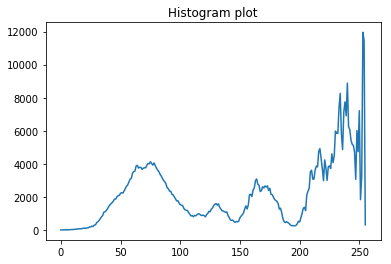

In [22]:
# Calculate histogram using openCV method (40x faster than numpy method)
hist = cv2.calcHist([img],[0],None,[256],[0,256]) # binCountx1 sized array
plt.plot(hist), plt.title('Histogram plot')
plt.show()

In [38]:
# Calculate histogram using numpy method
hist_np,_ = np.histogram(img[:,:,0].ravel(), 256,[0,256])

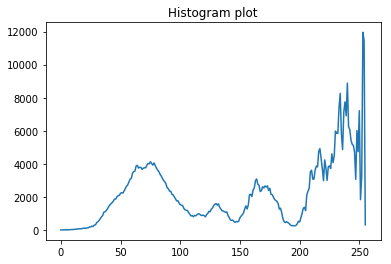

In [39]:
plt.plot(hist_np), plt.title('Histogram plot')
plt.show()

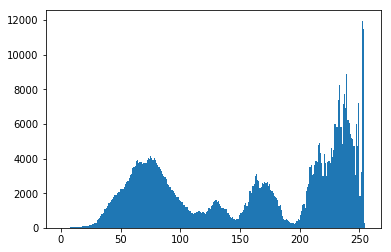

In [7]:
# Plot histogram directly with matplotlib
plt.hist(img[:,:,0].ravel(),256,[0,255],histtype='bar'); plt.show()

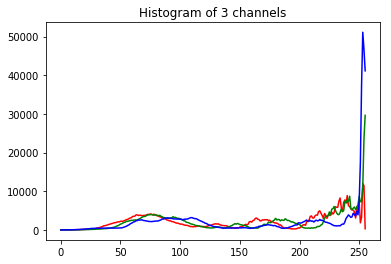

In [21]:
# Combined histogram of 3 channels
color = ['r','g','b']
for idx,c in enumerate(color):
    hist = cv2.calcHist([img],[idx],None,[256],[0,256])
    plt.plot(hist, color=c)
plt.title('Histogram of 3 channels'); plt.show()

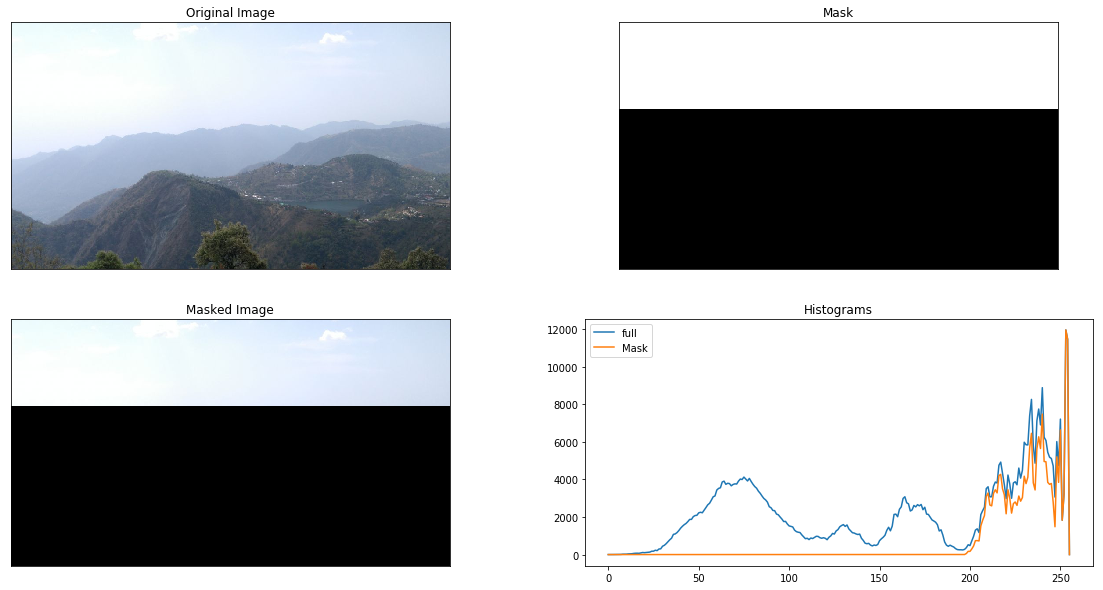

In [29]:
# Histogram of ROI
channel = 0
mask = np.zeros(img.shape[:2], dtype=np.uint8)
mask[:200] = 255

img_masked = cv2.bitwise_and(img,img,mask=mask)

hist_full = cv2.calcHist([img],[channel],None,[256],[0,255])
hist_mask = cv2.calcHist([img],[channel],mask,[256],[0,255])

plt.figure(figsize=(20,10))
plt.subplot(221) , plt.imshow(img), plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(222) , plt.imshow(mask,"gray"), plt.title('Mask'), plt.xticks([]), plt.yticks([])
plt.subplot(223) , plt.imshow(img_masked), plt.title('Masked Image'), plt.xticks([]), plt.yticks([])
plt.subplot(224) , plt.plot(hist_full, label='full'), plt.plot(hist_mask, label='Mask'), plt.title('Histograms'), 
plt.legend()
plt.show()

##### Histogram Equilization

In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

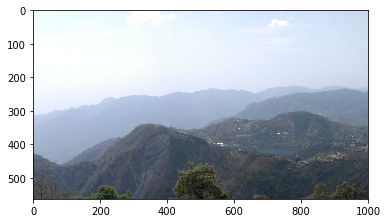

In [78]:
# Read images
img = cv2.imread('/home/cognitifai/Pictures/landscape.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

plt.imshow(img,"gray")
plt.show()

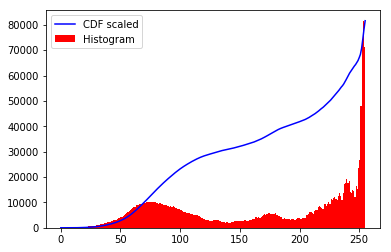

In [57]:
# Numpy Implementation
hist,bins = np.histogram(img.flatten(), 256, [0,255])
cdf = hist.cumsum()
cdf_scaled = cdf*hist.max()/cdf.max()

plt.plot(cdf_scaled,color='b',label='CDF scaled')
plt.hist(img.flatten(),256,[0,255],color='r',label='Histogram')
plt.legend(loc='upper left')
plt.show()

In [63]:
# As most of histogram lies in the brighter region, we need a transformation to map pixels intensities on
# brighter side to intensities across spectrum.
cdf_m = np.ma.masked_invalid(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*(256-1)/(cdf_m.max() - cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype(np.uint8) # A lloup table for intensity transformation

In [68]:
# Generate Equilized image
img_he = cdf[img]

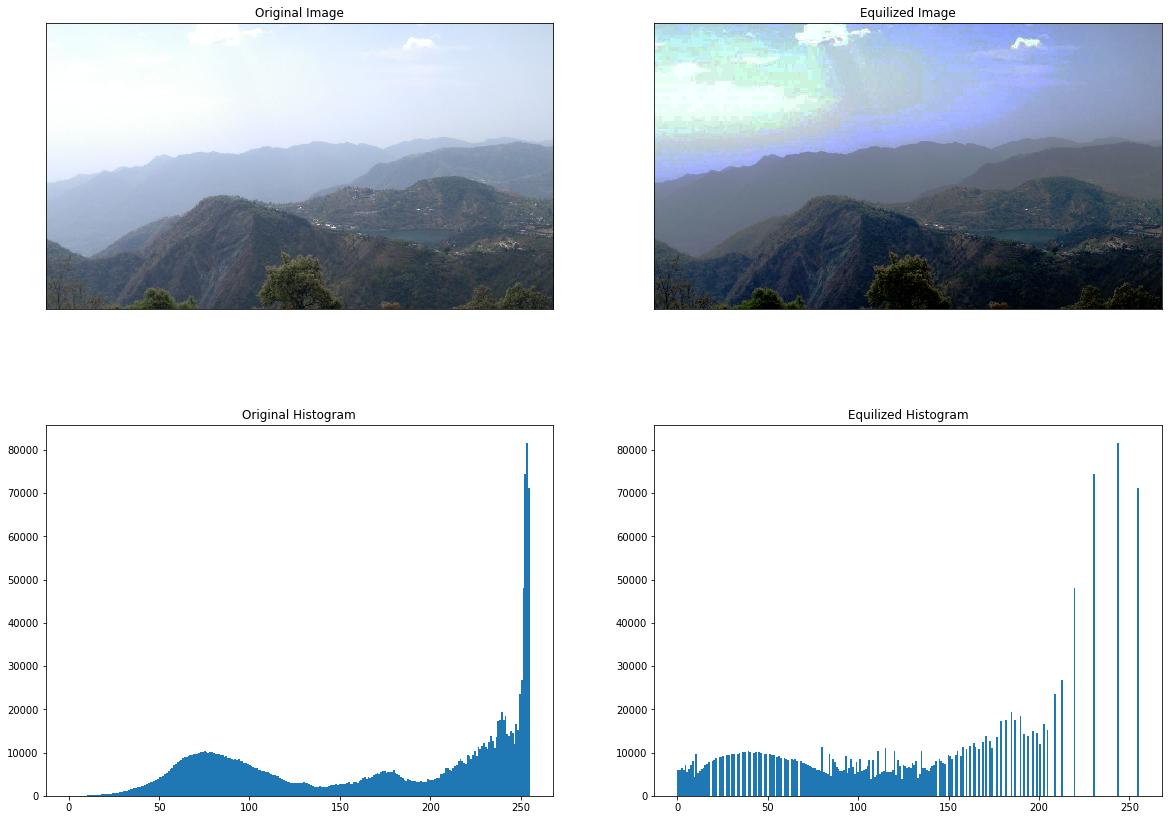

In [75]:
plt.figure(figsize=(20,15))
plt.subplot(221), plt.imshow(img), plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(222), plt.imshow(img_he), plt.title('Equilized Image'), plt.xticks([]), plt.yticks([])
plt.subplot(223), plt.hist(img.flatten(),256,[0,255],color='r'), plt.plot(hist, )plt.title('Original Histogram')
plt.subplot(224), plt.hist(img_he.flatten(),256,[0,255]), plt.title('Equilized Histogram')
plt.show()

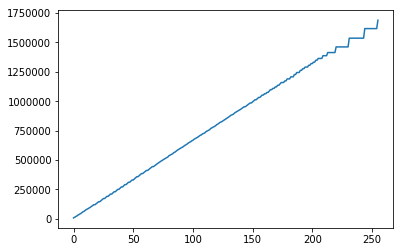

In [76]:
# CDF plot - Equilized
hist_eq,_ = np.histogram(img_he.flatten(), 256, [0,255])
cdf_eq = hist_eq.cumsum()
plt.plot(cdf_eq)

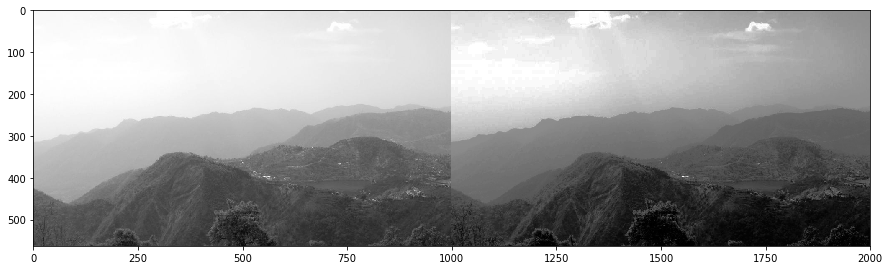

In [83]:
# OpenCV Implementation

img_he2 = cv2.equalizeHist(img_gray)

img_compare = np.hstack([img_gray, img_he2])
plt.figure(figsize=(15,15))
plt.imshow(img_compare,"gray") ; plt.show()

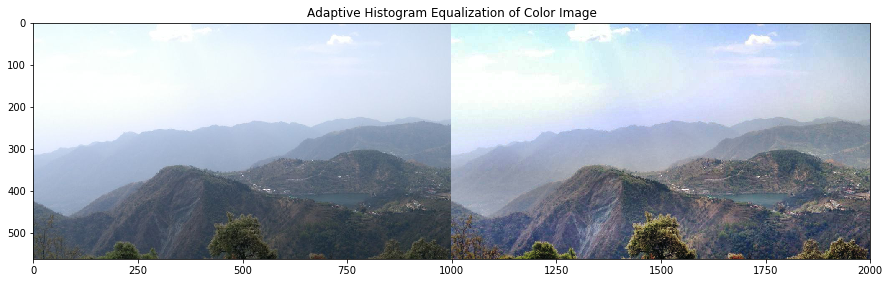

In [100]:
# Adaptive histogram equilization
img_adhe = np.zeros_like(img)
for channel in range(3):
    img_c = img[...,channel]
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(4,4))
    img_adhe[...,channel] = clahe.apply(img_c)

img_compare = np.hstack([img, img_adhe])
plt.figure(figsize=(15,15)), plt.title('Adaptive Histogram Equalization of Color Image')
plt.imshow(img_compare,"gray") ; plt.show()

#### Histogram-2D
#### Ref
[OpenCV Histogram 2D](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_histograms/py_2d_histogram/py_2d_histogram.html)
#### Notes
- In 1-D histogram, we take 1 feature into consideration (grayscale intensity). 
- In 2-D histogram, we take 2 features - Hue and Saturation values of each pixel.
- In openCV use same function - `cv2.calcHist()`
- In Numpy, use `np.histogram2d()`

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

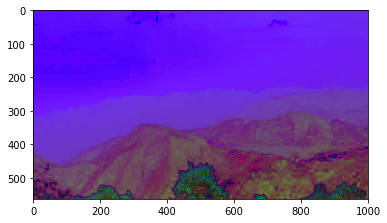

In [2]:
# Read images
img = cv2.imread('/home/cognitifai/Pictures/landscape.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

plt.imshow(img,"gray")
plt.show()

In [32]:
# opencv method
ticks = cv2.getTickCount()
hist_o = cv2.calcHist([img],[0,1],None,[180,256],[0,180,0,256])
ticks = cv2.getTickCount() - ticks
to=ticks/cv2.getTickFrequency()
print(hist_o.shape)
print("Time Taken - ", to)

(180, 256)
Time Taken -  0.001574937


In [34]:
# 2D histogram in numpy
ticks = cv2.getTickCount()
hist_n,xbins,ybins = np.histogram2d(img[...,0].ravel(), img[...,1].ravel(),[180,256],[(0,180),(0,256)])
ticks = cv2.getTickCount() - ticks
tn=ticks/cv2.getTickFrequency()
print(hist_o.shape)
print("Time Taken - ", tn)
print("OpenCV method is - %dx faster" % (tn/to))

(180, 256)
Time Taken -  0.040966926
OpenCV method is - 26x faster


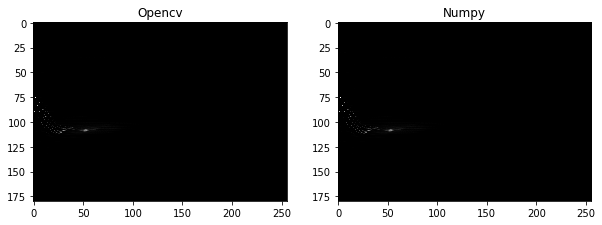

In [22]:
plt.figure(figsize=(10,15))
plt.subplot(121), plt.imshow(hist_o,"gray",interpolation = 'nearest'), plt.title("Opencv")
plt.subplot(122), plt.imshow(hist_n,"gray",interpolation = 'nearest'), plt.title("Numpy")
plt.show()

### Fourier Transform of Image
#### Ref
[DFT - OpenCV](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_transforms/py_fourier_transform/py_fourier_transform.html#fourier-transform)
#### Notes
- Fourier Transform is used to analyze freq characteristics of Image and various filters. 
- As Image and filters are 2D, 2D DFT are used to generate frequency domain map. DFT is computed using FFT algorithm.
- For Images, if intensity varies faster in short spatial span, it containes high frequency signal. If varies slowly, low frequency signals are present. So at *edge-pixels*, *noise*, high frequency component is present.
- **In Numpy** - `np.fft` package provides APIs to work with frequency domain. `np.fft.fft2()` generates 2-D DFT map of grayscale image having complex values.
- **In openCV** - `cv.dft()`, `cv.idft()` - Faster than numpy counterparts

In [35]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

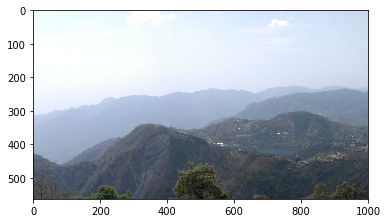

In [37]:
# Read images
img = cv2.imread('/home/cognitifai/Pictures/landscape.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img,"gray")
plt.show()

Elements are of complex type -  complex128


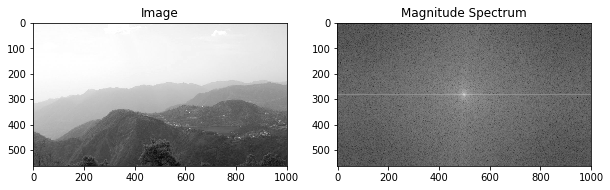

In [46]:
import numpy.fft as fft

dft_img = fft.fft2(img_gray)
print("Elements are of complex type - ",dft_img.dtype)

# Shift DC (0-freq) component to center of spectrum
dft_shifted = fft.fftshift(dft_img)
# Generate magnitude spectrum from 2D-DFT in dB
dft_mag = 20*np.log(np.abs(dft_shifted))

plt.figure(figsize=(10,15))
plt.subplot(121),plt.imshow(img_gray, cmap = 'gray'), plt.title('Image')
plt.subplot(122),plt.imshow(dft_mag, cmap = 'gray'), plt.title('Magnitude Spectrum')
plt.show()
# Display shows that low frequency component is more.

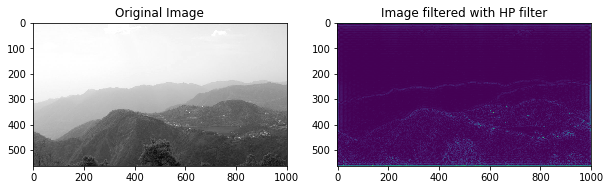

In [120]:
# Image operations in frequency domain like High/Low pass filtering
h,w = dft_img.shape
h_2,w_2 = int(h/2), int(w/2)
dft_shifted[h_2-30:h_2+30, w_2-30:w_2+30] = 0 # Remvove fequency components within 60Hz
# using rectangular window, although better option is gaussian window.

# Apply inverse shift to put DC component back to top-left corner
dft_hp = fft.ifftshift(dft_shifted)
# Perform 2D Inverse-FFT. It has complex values, so we need to take absolute value
img_hp = fft.ifft2(dft_hp)
img_hp = np.abs(img_hp)

plt.figure(figsize=(10,15))
plt.subplot(121),plt.imshow(img_gray, cmap = 'gray'), plt.title('Original Image')
plt.subplot(122),plt.imshow(img_hp.astype(np.uint8)), plt.title('Image filtered with HP filter')
plt.show()
# shows that most of the image data is present in the Low frequency region of the spectrum. 
# and shows HPF is an edge-detection algorithm

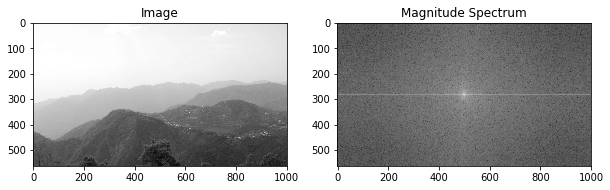

In [133]:
# Calculation of DFT/IDFT in openCV
img_dft = cv2.dft(np.float32(img_gray), flags = cv2.DFT_COMPLEX_OUTPUT)
img_dft_shifted = fft.fftshift(img_dft)

magnitude_spectrum = 20*np.log(cv2.magnitude(img_dft_shifted[:,:,0],img_dft_shifted[:,:,1]))

plt.figure(figsize=(10,15))
plt.subplot(121),plt.imshow(img_gray, cmap = 'gray'), plt.title('Image')
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray'), plt.title('Magnitude Spectrum')
plt.show()

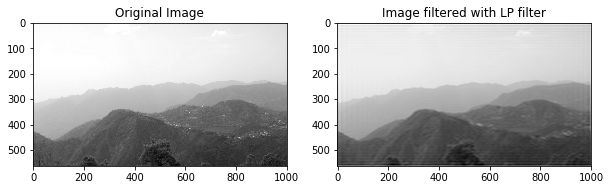

In [142]:
# process image in frequency domain - Apply LPF
h,w = img_gray.shape
h = int(h/2); w = int(w/2)

# Create recatngular 2D mask for frequency domain
mask = np.zeros_like(img_dft_shifted[...,0], dtype=np.uint8)
offset = 50
mask[h-offset:h+offset , w-offset:w+offset] = 255

# Apply Mask
img_dft_shifted_2 = cv2.bitwise_and(img_dft_shifted,img_dft_shifted,mask=mask)

# Inverse shift and inverse fft
img_dft_lp = fft.ifftshift(img_dft_shifted_2)
# Perform 2D Inverse-FFT and calculate magnitude
img_lp = cv2.idft(img_dft_lp)
img_lp = cv2.magnitude(img_lp[...,0],img_lp[...,1])

plt.figure(figsize=(10,15))
plt.subplot(121),plt.imshow(img_gray, cmap = 'gray'), plt.title('Original Image')
plt.subplot(122),plt.imshow(img_lp,"gray"), plt.title('Image filtered with LP filter')
plt.show()

##### Faster DFT/IDFT

In [143]:
# Opencv
h,w = img_gray.shape
h_op = cv2.getOptimalDFTSize(h)
w_op = cv2.getOptimalDFTSize(w)
print("Original Image size - (%d,%d)" % (h,w))
print("DFT optimized Image size - (%d,%d)" % (h_op,w_op))

Original Image size - (563,1000)
DFT optimized Image size - (576,1000)


In [150]:
nImg = np.zeros((h_op,w_op))
nImg[:h,:w] = img_gray

In [153]:
%timeit fft1_cv = cv2.dft(np.float32(img_gray), flags=cv2.DFT_COMPLEX_OUTPUT)
%timeit fft2_cv = cv2.dft(np.float32(nImg), flags=cv2.DFT_COMPLEX_OUTPUT)

101 ms ± 2.08 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
6.67 ms ± 251 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [154]:
# Numpy
%timeit fft1_np = np.fft.fft2(img_gray)
%timeit fft2_np = np.fft.fft2(img_gray,[h_op,w_op])

365 ms ± 1.33 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
19 ms ± 70.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


##### Visualize Kernels in Frequency domain

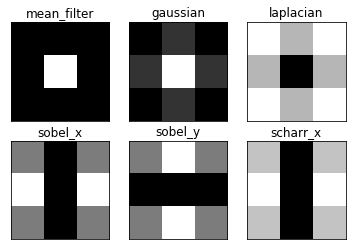

In [169]:
# simple averaging filter without scaling parameter
mean_filter = np.ones((3,3))

# creating a guassian filter
x = cv2.getGaussianKernel(3,1)
gaussian = x*x.T

# different edge detecting filters
# scharr in x-direction
scharr = np.array([[-3, 0, 3],
                   [-10,0,10],
                   [-3, 0, 3]])
# sobel in x direction
sobel_x= np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])
# sobel in y direction
sobel_y= np.array([[-1,-2,-1],
                   [0, 0, 0],
                   [1, 2, 1]])
# laplacian
laplacian=np.array([[0, 1, 0],
                    [1,-4, 1],
                    [0, 1, 0]])

filters = [mean_filter, gaussian, laplacian, sobel_x, sobel_y, scharr]
filter_name = ['mean_filter', 'gaussian','laplacian', 'sobel_x', \
                'sobel_y', 'scharr_x']
fft_filters = [np.fft.fft2(x) for x in filters]
fft_shift = [np.fft.fftshift(y) for y in fft_filters]
mag_spectrum = [20*np.log(np.abs(z)+1) for z in fft_shift]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(mag_spectrum[i],cmap = 'gray')
    plt.title(filter_name[i]), plt.xticks([]), plt.yticks([])

plt.show()

### Template matching
#### Ref
[TM - OpenCV](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_template_matching/py_template_matching.html)
#### Notes
- sdfw